In [1]:
import pandas as pd
import numpy as np
import pickle
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import feature_selection as f_select
import os.path
import warnings
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from pydoc import help
from scipy.stats.stats import pearsonr


In [2]:
DATA_DIR = os.path.join(r'C:\Users\abrah\Documents\Capstone project\finaldataset.csv')
salary = pd.read_csv(os.path.join(DATA_DIR))
salary.drop(['Unnamed: 0'], axis=1, inplace=True)


C:\Users\abrah\Anaconda\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


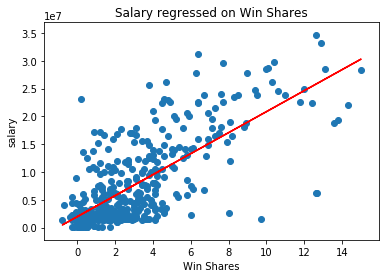

In [3]:
#Creating a linear regression model with only one variable (WS is used as it has the highest correlation with salary)
lr = smf.ols('Salary ~ WS', data=salary)
fit1 = lr.fit()
x = salary.WS
y = salary.Salary


fig, ax = plt.subplots()
fit = np.polyfit(x, y, deg=1)
ax.plot(salary.WS, fit[0] * x + fit[1], color='red')
ax.scatter(x, y)
ax.set(xlabel='Win Shares', ylabel='salary', title = 'Salary regressed on Win Shares')
fig.show()


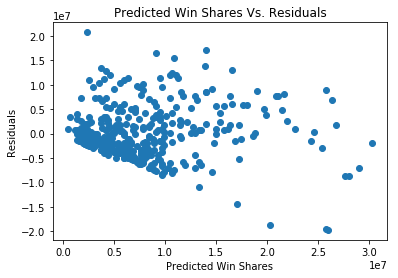

In [4]:
#residuals
y_pred = fit1.predict(salary.WS)
residuals = salary.Salary - y_pred
plt.scatter(y_pred, residuals)

plt.title("Predicted Win Shares Vs. Residuals")
plt.xlabel("Predicted Win Shares")
plt.ylabel("Residuals")
plt.show()


C:\Users\abrah\Anaconda\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


[Text(0, 0.5, 'squareroot(salary)'),
 Text(0.5, 0, 'Win Shares'),
 Text(0.5, 1.0, 'Squaroot(salary) regressed on points per game')]

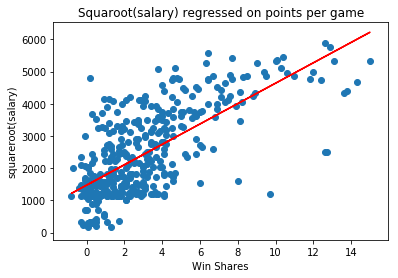

In [5]:
#Based on the results, Heteroskedasticity is present in this model which is a problem as the model tries to predict higher values of salaries, the variance of error increases.
#To attempt to address the problem of Heteroskedasticity, a square root variance-stabilizing transformation is used 
salary['sqrtsalary'] = np.sqrt(salary.Salary)
lr2 = smf.ols('sqrtsalary ~ WS', data=salary)
fit2 = lr2.fit()
x1 = salary.WS
y1 = salary.sqrtsalary
fig, ax = plt.subplots()
fit = np.polyfit(x1, y1, deg=1)
ax.plot(salary.WS, fit[0] * x1 + fit[1], color='red')
ax.scatter(x1, y1)
fig.show()
ax.set(xlabel='Win Shares', ylabel='squareroot(salary)', title = 'Squaroot(salary) regressed on points per game')


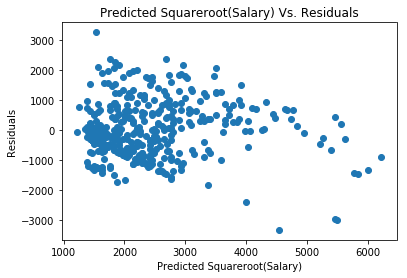

In [6]:
#residuals
y_pred = fit2.predict(salary.WS)
residuals = salary.sqrtsalary - y_pred
plt.scatter(y_pred, residuals)
plt.title("Predicted Squareroot(Salary) Vs. Residuals")
plt.xlabel("Predicted Squareroot(Salary)")
plt.ylabel("Residuals")
plt.show()


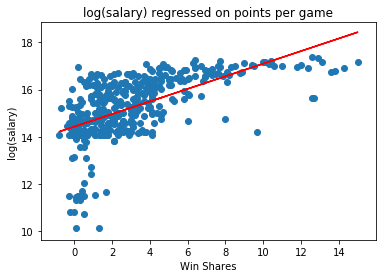

In [7]:
# Heteroskedasticity is still present but there is an improvement from the previous model

#To attempt to address the problem of Heteroskedasticity, a log variance-stabilizing transformation is used 
salary['logy'] = np.log(salary.Salary)
lr3 = smf.ols('logy ~ WS', data=salary)
fit3 = lr3.fit()

x3 = salary.WS
y3 = salary.logy

fig, ax = plt.subplots()
fit = np.polyfit(x3, y3, deg=1)
ax.plot(salary.WS, fit[0] * x3 + fit[1], color='red')
ax.scatter(x3, y3)
ax.set(xlabel='Win Shares', ylabel='log(salary)', title = 'log(salary) regressed on points per game')
plt.show()


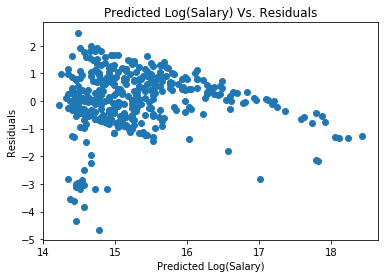

In [8]:
#residuals
y_pred = fit3.predict(salary.WS)
residuals = salary.logy - y_pred
plt.scatter(y_pred, residuals)
plt.title("Predicted Log(Salary) Vs. Residuals")
plt.xlabel("Predicted Log(Salary)")
plt.ylabel("Residuals")
plt.show()


In [9]:
#Based on the results, log variance-stabilizing transformation make the Heteroskedasticity problem worse so the square root transformation will be used instead

In [10]:
#Linear Regression Model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(salary.loc[:, salary.columns != 'sqrtsalary'], salary. sqrtsalary, test_size=0.2, random_state =1234)


In [11]:
#train
y= y_train
X = X_train[['WS', 'PTS/G', 'DRB/G', 'BPM']]
#test
y_test = y_test
X_test = X_test[['WS', 'PTS/G', 'DRB/G', 'BPM']]

linreg = LinearRegression()
linreg_scores = cross_val_score(linreg, X, y, cv=5)
print(np.mean(linreg_scores))


0.5404223821960331


In [12]:
linreg.fit(X, y)
linreg.score(X_test, y_test)


0.6080563084366193

In [13]:
linreg.score(X, y)

0.550669635529975

In [14]:
#Ridge linear regression model

#define perimeter values that should be searched
alpha_range = [1e-4, 1e-3, 1.5e-3, 1e-2, 1.5e-2, 1e-1, 1, 5, 10, 50, 100, 1000, 10000, 100000]
normalize_range = [True, False]
print(alpha_range, normalize_range)


[0.0001, 0.001, 0.0015, 0.01, 0.015, 0.1, 1, 5, 10, 50, 100, 1000, 10000, 100000] [True, False]


In [15]:
#Create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(alpha=alpha_range, normalize=normalize_range)
print(param_grid)


{'alpha': [0.0001, 0.001, 0.0015, 0.01, 0.015, 0.1, 1, 5, 10, 50, 100, 1000, 10000, 100000], 'normalize': [True, False]}


In [16]:
#instantiate the grid
grid = GridSearchCV(Ridge(), param_grid, cv=5)
grid.fit(X, y)


C:\Users\abrah\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.0015, 0.01, 0.015, 0.1, 1, 5, 10, 50, 100, 1000, 10000, 100000], 'normalize': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [17]:
#view best parameter
print("Best parameters set found on development set:")
print()
print(grid.best_params_)


Best parameters set found on development set:

{'alpha': 50, 'normalize': False}


In [18]:
print()
print("Grid scores on development set:")
print()
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']



Grid scores on development set:



In [19]:
# Run Ridge with optimized alpha and normalize parameters
ridge = Ridge(alpha=50, normalize=False)


In [20]:
#Fit Model
ridge.fit(X, y)


Ridge(alpha=50, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [21]:
print('Coefficients:',ridge.coef_)

Coefficients: [126.06886013  83.60382963 135.67172114 -23.29741386]


In [22]:
print('Intercept:',ridge.intercept_)

Intercept: 854.5819264644454


In [23]:
#5 fold cross-validation r^2 mean score
ridge_scores = cross_val_score(ridge, X, y, cv=5)
print(np.mean(ridge_scores))


0.5408231452117336


In [24]:
#Lasso Linear regression model
# Define the parameter values that should be searched
alpha_range = [1e-4, 1e-3, 1.5e-3, 1e-2, 1.5e-2, 1e-1, 1, 5, 10, 50, 100, 1000, 10000, 100000]
normalize_range = [True, False]
print(alpha_range, normalize_range)


[0.0001, 0.001, 0.0015, 0.01, 0.015, 0.1, 1, 5, 10, 50, 100, 1000, 10000, 100000] [True, False]


In [25]:
# Create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(alpha=alpha_range, normalize=normalize_range)
print(param_grid)


{'alpha': [0.0001, 0.001, 0.0015, 0.01, 0.015, 0.1, 1, 5, 10, 50, 100, 1000, 10000, 100000], 'normalize': [True, False]}


In [26]:
# Instantiate the grid
grid = GridSearchCV(Lasso(), param_grid, cv=5)
grid.fit(X, y)


C:\Users\abrah\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.0015, 0.01, 0.015, 0.1, 1, 5, 10, 50, 100, 1000, 10000, 100000], 'normalize': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [27]:
# View the best parameter
print("Best parameters set found on development set:")
print()
print(grid.best_params_)


Best parameters set found on development set:

{'alpha': 5, 'normalize': False}


In [28]:
print()
print("Grid scores on development set:")
print()
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']



Grid scores on development set:



In [29]:
# Run Lasso with optimized alpha and normalize parameters
lasso = Lasso(alpha=5, normalize=False)


In [30]:
#Fit model
lasso.fit(X, y)


Lasso(alpha=5, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [31]:
#View coefficients and intercept
print('Coefficients:',lasso.coef_)


Coefficients: [130.03559126  82.25365646 141.99699473 -26.61377985]


In [32]:
print('Intercept:',lasso.intercept_)

Intercept: 833.353729602763


In [33]:
# 5 fold cross-validation r^2 mean score
lasso_scores = cross_val_score(lasso, X, y, cv=5)
print(np.mean(lasso_scores))


0.5404307674917821


In [34]:
#Elastic Net
from sklearn.linear_model import ElasticNet
# Define the parameter values that should be searched
alpha_range = [1e-4, 1e-3, 1.5e-3, 1e-2, 1.5e-2, 1e-1, 1, 5, 10, 50, 100, 1000, 10000, 100000]
normalize_range = [True, False]
print(alpha_range, normalize_range)


[0.0001, 0.001, 0.0015, 0.01, 0.015, 0.1, 1, 5, 10, 50, 100, 1000, 10000, 100000] [True, False]


In [35]:
# Create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(alpha=alpha_range, normalize=normalize_range)
print(param_grid)


{'alpha': [0.0001, 0.001, 0.0015, 0.01, 0.015, 0.1, 1, 5, 10, 50, 100, 1000, 10000, 100000], 'normalize': [True, False]}


In [36]:
# Instantiate the grid
grid = GridSearchCV(ElasticNet(), param_grid, cv=5)
grid.fit(X, y)


C:\Users\abrah\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.0015, 0.01, 0.015, 0.1, 1, 5, 10, 50, 100, 1000, 10000, 100000], 'normalize': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [37]:
# View the best parameter
print("Best parameters set found on development set:")
print()
print(grid.best_params_)


Best parameters set found on development set:

{'alpha': 0.0001, 'normalize': True}


In [38]:
print()
print("Grid scores on development set:")
print()
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']



Grid scores on development set:



In [39]:
eNet = ElasticNet(alpha=0.0001, normalize=True)
eNet.fit(X, y)


ElasticNet(alpha=0.0001, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=True, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [40]:
print('Coefficients:',eNet.coef_)

Coefficients: [127.53380552  80.63192365 143.92550648 -23.5581577 ]


In [41]:
print()
print('Intercept:',eNet.intercept_)



Intercept: 853.3074911600143


In [42]:
eNet = cross_val_score(eNet, X, y, cv=5)
print(np.mean(eNet))


0.5406374293225135


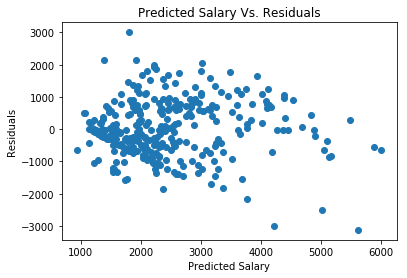

In [43]:
#All three models perform similarly with a score of around 0.54 with Ridge model slightly performing better than others at 0.5408.
#Residuals
y_pred = ridge.predict(X)
residuals = y - y_pred
plt.scatter(y_pred, residuals)
plt.title("Predicted Salary Vs. Residuals")
plt.xlabel("Predicted Salary")
plt.ylabel("Residuals")
plt.show()


In [45]:
#Analysis of Ridge from 1st model
#calculate rmse
from sklearn.metrics import mean_squared_error
from math import sqrt
y_pred_test = ridge.predict(X_test)
rms = sqrt(mean_squared_error(y_test, y_pred_test))
rms**2


718445.5503618782

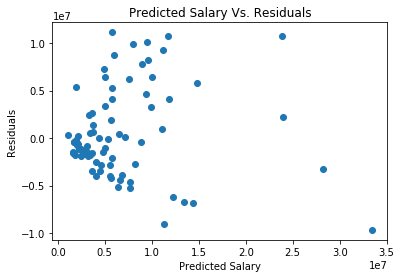

In [46]:
ridge_resid = (y_test**2) - (y_pred_test**2)
plt.scatter((y_pred_test**2), ridge_resid)
plt.title("Predicted Salary Vs. Residuals")
plt.xlabel("Predicted Salary")
plt.ylabel("Residuals")
plt.show()


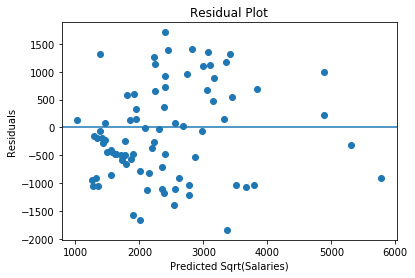

In [47]:
ridge_resid = (y_test) - (y_pred_test)
plt.scatter((y_pred_test), ridge_resid)
plt.title("Residual Plot")
plt.xlabel("Predicted Sqrt(Salaries)")
plt.ylabel("Residuals")
plt.axhline(0)
plt.show()


C:\Users\abrah\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


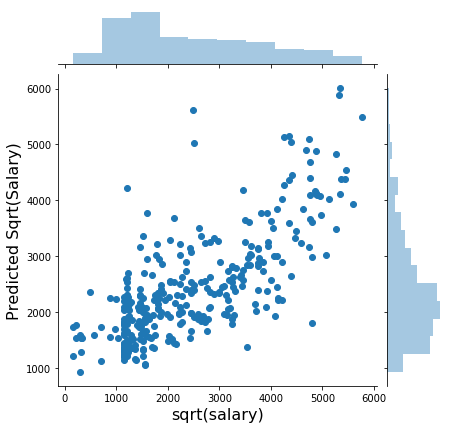

In [48]:
#Train data
salary_train_pred = ridge.predict(X)
z = sns.jointplot(y, salary_train_pred)
z.set_axis_labels('sqrt(salary)', 'Predicted Sqrt(Salary)', fontsize=16)
plt.show()


In [49]:
pearsonr(y, salary_train_pred)

(0.7419727744078685, 1.4613687450273958e-58)

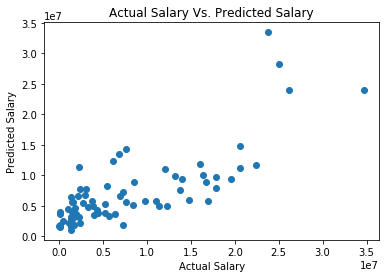

In [50]:
#Test data
plt.scatter(y_test**2, y_pred_test**2)
plt.title("Actual Salary Vs. Predicted Salary")
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.show()


In [51]:
pearsonr(y_test**2, y_pred_test**2)

(0.7900405316907608, 6.808370239549563e-19)